#2-D Plotting of Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [0]:
def sigmoid_1d(w, b, x):
  return (1/(1+(np.exp(-w*x - b))))

In [0]:
w = -2    #@param {type: "slider", min: -3, max: 3}
b = 0.8    #@param {type: "slider", min: -5, max: 5}

X = np.linspace(-5, 5, 20)

In [0]:
Y = sigmoid_1d(w,b,X)

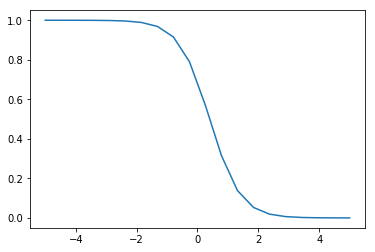

In [12]:
plt.plot(X, Y)
plt.show()

#3-D Plotting of Sigmoid Function

In [0]:
from mpl_toolkits import mplot3d
import matplotlib.colors

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(- (w1*x1) - (w2*x2) - b)) 

In [0]:
x1 = np.linspace(-10, 10, 1000)
x2 = np.linspace(-10, 10, 1000)

xx1, xx2 = np.meshgrid(x1, x2)

w1 = 0.5
w2 = 0.5
b = 0.1

y = sigmoid_2d(xx1, xx2, w1, w2, b)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

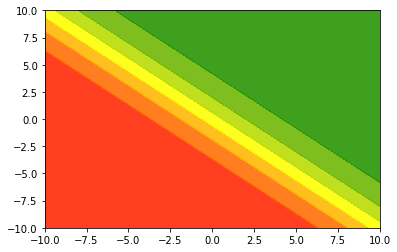

In [17]:
plt.contourf(xx1, xx2, y, cmap = my_cmap, alpha = 0.88)
plt.show()

3D Contour Plot

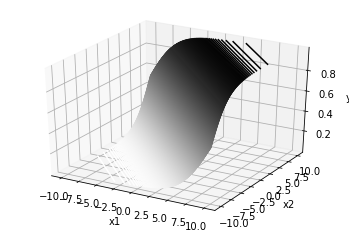

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xx1, xx2, y, 800, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');


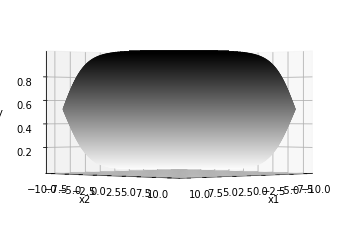

In [19]:
#for viewing the plot in different angles 
#here, ax.view_inint(x, y) has two parameters
#x is the angle from the x-y plane, this is also known as azimuthal angle
#y is the angle around the z-axis
ax.view_init(0, 45)
fig

Wireframes and Surface Plots

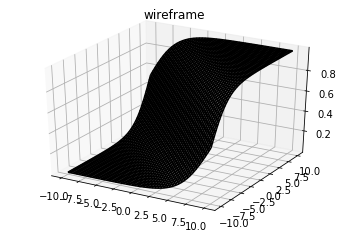

In [20]:
#Wireframe Plot

fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(xx1, xx2, y, color='black')
ax.set_title('wireframe');

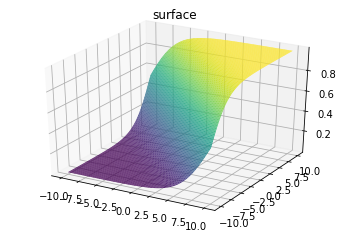

In [21]:
#Surface Plot
#Each face of the wireframe is filled with a polygon
#This plot will hep us in understanding the toplogy of the plot better

ax = plt.axes(projection='3d')
ax.plot_surface(xx1, xx2, y, rstride=10, cstride=10,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');


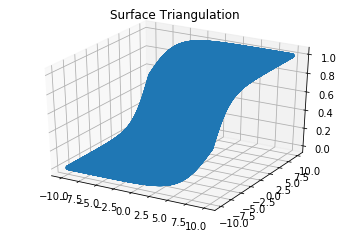

In [22]:
ax = plt.axes(projection='3d')
ax.scatter(xx1, xx2, y, cmap='viridis', linewidth=0)
ax.set_title('Surface Triangulation');

#Plotting Loss Function



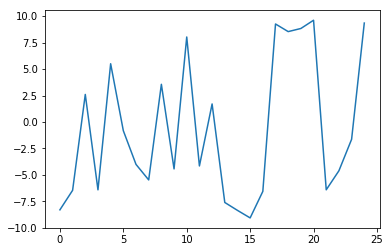

In [23]:
x = np.random.random(25)*20 - 10
#The plot is averaged around 0
plt.plot(x)

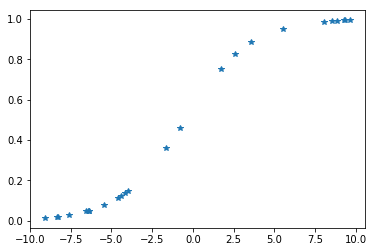

In [24]:
w_unknown = 0.5
b_unknown = 0.25
y = sigmoid_1d(w_unknown, b_unknown, x)

plt.plot(x, y, '*')

In [0]:
def lossFunc(w_est, b_est, x, y):
  loss = 0
  for a, b in zip(x, y):
    loss += ((b - sigmoid_1d(w_est, b_est, a)) ** 2)
  
  return loss


In [26]:
lossFunc(0.8, 1.2, x, y)

0.1155532678246889

In [0]:
w = np.linspace(0, 1, 100)
b = np.linspace(-1, 1, 100)

ww, bb = np.meshgrid(w, b)

loss = np.zeros(ww.shape)

In [0]:
for i in range(ww.shape[0]):
  for j in range(ww.shape[1]):
    loss[i, j] = lossFunc(ww[i, j], bb[i, j], x, y)


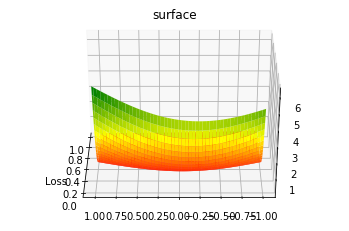

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, loss, cmap = my_cmap)
ax.set_xlabel('w')
ax.set_xlabel('b')
ax.set_xlabel('Loss')
ax.set_title('surface')
ax.view_init(30, 180)


In [0]:
ij = np.argmin(loss)

i = int(np.floor(ij/loss.shape[1]))
j = int(ij - (i * loss.shape[1]))

In [31]:
loss[i, j]

5.002085322681535e-05

In [32]:
print(ww[i, j], bb[i, j])

0.5050505050505051 0.2525252525252526


#Sigmoid Neuron Class


In [0]:
class SigmoidNeuron(object):
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return (np.dot(x, self.w.T) + self.b)
  
  def sigmoid(self, x):
    return 1/(1+np.exp(-x))
    
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)*(y_pred)*(1 - y_pred)*(x)
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)*(y_pred)*(1 - y_pred)
  
  def fit(self, x, y, epochs = 1, learning_rate = 1.0, initialize = True, display_loss = False):
    
    if initialize:
      self.w = np.random.randn(1, x.shape[1])
      self.b = 0
    
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epoch'):
      dw = 0
      db = 0
      
      for a, b in zip(x, y):
        dw += self.grad_w(a, b)
        db += self.grad_b(a, b)
        
      self.w -= dw*learning_rate
      self.b -= db*learning_rate
      
      if display_loss:
        y_pred = self.sigmoid(self.perceptron(x))
        loss[i] = mean_squared_error(y_pred, y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
    
  def predict(self, x):
    y_pred = []
    for a in x:
      y = self.sigmoid(self.perceptron(a))
      y_pred.append(y)    
    
    return (np.array(y_pred)).ravel()

Fit for TOY DATA


In [0]:
sn = SigmoidNeuron()

In [0]:
x = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [3, 1.25], [2, 4], [1, 5]])
y = [1, 1, 1, 0, 0, 0]

In [0]:
sn.fit(x, y, learning_rate = 0.25, initialize = True)

In [37]:
for i in range(10):
  print(sn.w, sn.b)
  sn.fit(x, y, initialize = False)

[[-0.49605915 -1.1529213 ]] [0.03467259]
[[ 0.1267388  -1.26492794]] [0.19587368]
[[ 0.16562847 -1.20035279]] [0.21401435]
[[ 0.186532   -1.11778867]] [0.22914787]
[[ 0.20399854 -1.01444106]] [0.24571538]
[[ 0.22337439 -0.88585852]] [0.26578424]
[[ 0.24297026 -0.73453857]] [0.28872676]
[[ 0.24407373 -0.59752421]] [0.30541234]
[[ 0.20277371 -0.55274848]] [0.30092868]
[[ 0.18715426 -0.53964431]] [0.3012112]


#Connecting google drive to access files readily

In [38]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 5.0MB/s 


In [0]:
# Download a file based on its file ID.
#https://drive.google.com/open?id=1sMFldqaZHEWWYhRKI99PsBFbYcO8PbP4
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1sMFldqaZHEWWYhRKI99PsBFbYcO8PbP4'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('mobile_cleaned.csv')

In [0]:
import pandas as pd

data = pd.read_csv('mobile_cleaned.csv')

In [42]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


#Data Preprocessing

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, mean_squared_error

In [0]:
x = data.drop('Rating', axis = 1)
y = np.asarray(data['Rating'])

In [0]:
threshold = 4.2
data['class'] = (y > threshold).astype(np.int)
y_binarised = data['class']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y_binarised, random_state = 0)

In [0]:
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [0]:
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [0]:
y_scaled_train = min_max_scaler.fit_transform((np.asarray(y_train)).reshape(-1, 1))
y_scaled_test = min_max_scaler.transform((np.asarray(y_test)).reshape(-1, 1))

In [0]:
scaled_threshold = (min_max_scaler.transform((np.asarray(threshold)).reshape(1, -1)))[0][0]

In [0]:
y_binarised_train = (y_scaled_train > scaled_threshold).astype("int").ravel()
y_binarised_test = (y_scaled_test > scaled_threshold).astype("int").ravel()

In [59]:
np.size(y_scaled_train)

255

In [0]:
SN = SigmoidNeuron()

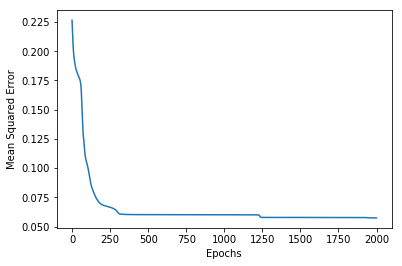

In [77]:
SN.fit(x_scaled_train, y_scaled_train, epochs = 2000, learning_rate = 0.015, display_loss = True)

In [0]:
y_train_pred = SN.predict(x_scaled_train)
y_test_pred = SN.predict(x_scaled_test)

In [0]:
y_pred_binarised_train = (y_train_pred > scaled_threshold).astype("int").ravel()
y_pred_binarised_test = (y_test_pred > scaled_threshold).astype("int").ravel()

In [80]:
accuracy_train = accuracy_score(y_binarised_train, y_pred_binarised_train)
accuracy_test = accuracy_score(y_binarised_test, y_pred_binarised_test)

print(accuracy_train, "  ", accuracy_test)

0.7686274509803922    0.7674418604651163
